Initialization of centroids is an important step in using a conventional k-means algorithm.   
It affects the SSE, lower the number, the better.  

In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [207]:
#create synthetic clusters

features, true_labels = make_blobs(n_samples=500, centers=4, cluster_std=2.75, random_state=19)

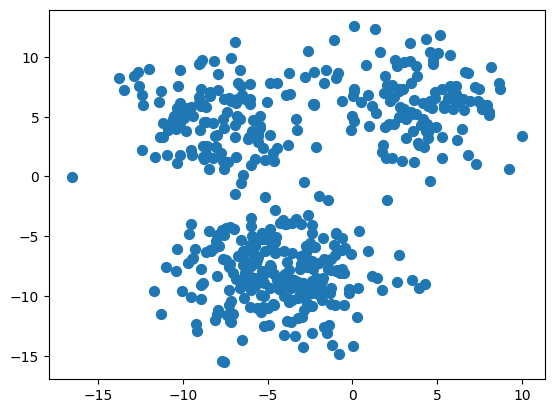

In [209]:
plt.scatter(features[:,0], features[:,1], s=50)

In [210]:
features[:5]

array([[-8.93514347, -9.09261846],
       [-2.54913543, -9.47805608],
       [ 1.42218502, -8.5299726 ],
       [ 1.8435666 ,  6.98431027],
       [-1.41360477, -1.99844854]])

In [211]:
true_labels[:5]

array([1, 1, 2, 3, 2])

> Data sets usually contain numerical features that have been measured in different units, such as height (in inches) and weight (in pounds). A machine learning algorithm would consider weight more important than height only because the values for weight are larger and have higher variability from person to person.  

> Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.  

> The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.   

In [212]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [213]:
scaled_features[:5]

array([[-1.1050595 , -1.06797273],
       [ 0.1448359 , -1.12041834],
       [ 0.92211885, -0.9914148 ],
       [ 1.00459337,  1.11957795],
       [ 0.36708657, -0.10268536]])

In [221]:
kmeans = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=None)

In [222]:
kmeans.fit(scaled_features)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",4
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'random'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [223]:
kmeans.inertia_

162.02225920213104

In [224]:
y_means = kmeans.predict(scaled_features)

In [225]:
kmeans.cluster_centers_

array([[ 0.24890191, -0.9713718 ],
       [ 1.39679233,  1.00526384],
       [-0.67276369, -0.90066895],
       [-0.89598991,  0.84402161]])

In [226]:
kmeans.n_iter_ #how many iterations it took to have the lowest SEE

9

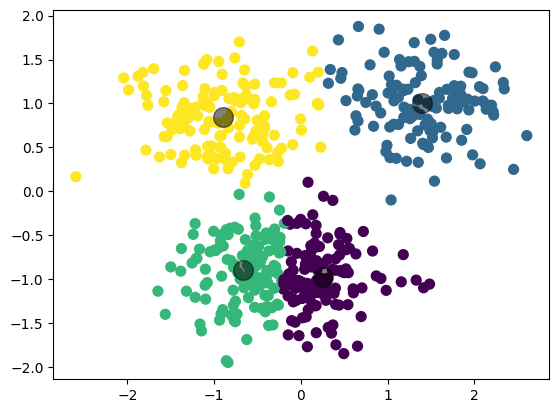

In [227]:
centers = kmeans.cluster_centers_
plt.scatter(scaled_features[:, 0], scaled_features[:,
            1], c=y_means, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

We can intuitively see that 3 centroids is the optimal segmetatation of this data set, the algorithm does not know the optimal number of centroids, so we must tell it beforehand.  

### How do we choose the appropriate amount of clusters?  